In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

### Task 1
Visualize (pmf, mean, variance) of pseudo random number generators (parametrized) that follows distributions:
- Single gaussian
- Two combined gaussian distributions
- N combined gaussian distributions

In [2]:
def plot_combined_gaussians(mus, variances, samples, bins):
    mu = np.sum(mus) / len(mus)
    sigma = np.sqrt(np.sum(variances) / len(variances))
    
    s = np.random.normal(mu, sigma, samples)
    _, bins, _ = plt.hist(s, bins, normed=True)

    mean = np.mean(s)
    std = np.std(s, ddof=1)
    
    plt.plot(bins, mlab.normpdf(bins, mu, sigma), linewidth=2, color='r')
    plt.axvline(mean, color='y', linestyle='--', linewidth=3)
    plt.plot([mean - std, mean + std], [0, 0], linewidth=10)

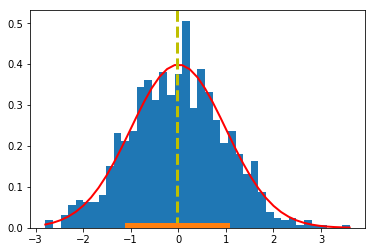

In [3]:
plot_combined_gaussians([0], [1], samples=1000, bins=40)

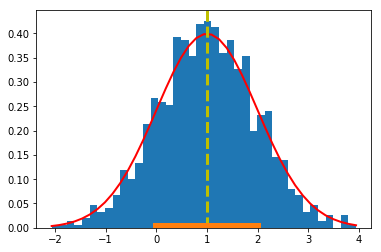

In [4]:
plot_combined_gaussians([0, 2], [1, 1], samples=1000, bins=40)


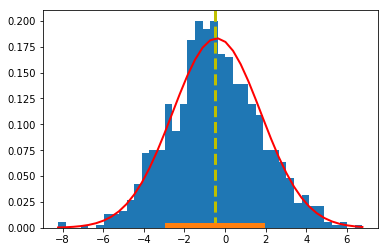

In [6]:
N = 100
mus = np.random.randint(-10, 10, N)
variances = np.random.uniform(0, 10, N)

plot_combined_gaussians(mus, variances, samples=1000, bins=40)


### Task 2
Student applied for 9 faculties, acceptance chance for each faculty was 0.01. Unfortunately student was not accepted to any. What is the probability of that situation? Write a function that will solve that problem (parametrized), use exact method and binomials based solution with parameterized number of trials (binomial)

In [7]:
faculties = 9
acceptance_chance = .01
reps = 20000

def get_probability_of_failure(trials, success_probability, reps):
    return sum(np.random.binomial(trials, success_probability, reps) == 0) / reps

probability = get_probability_of_failure(faculties, acceptance_chance, reps)

print(f'Probability is equal to {probability:.3%}')

Probability is equal to 91.315%


### Task 3
Solve previous task taking into account that acceptance chance for each faculty was different  (multinomial)

Cause multinomial gives success at every "roll", that is why <a href="https://en.wikipedia.org/wiki/Poisson_binomial_distribution">Poisson binomial</a> is probably more adequate for this taks.

In [103]:
def poisson_binomial_for_failure(probabilities):
    failurure_chance = 1
    for prob in probabilities:
        failurure_chance *= (1 - prob)
        
    return failurure_chance

In [133]:
acceptance_chances = [.05, .15, .01, .1, .1, .13, .05, .05, .1]

probability = poisson_binomial_for_failure(acceptance_chances)

print(f'Probability for given acceptance cahnces is equal to {probability:.3%}')

Probability for given acceptance cahnces is equal to 45.758%


In [119]:
# faculties = 9
# acceptance_chance = [.05, .1, .25, .1, .1, .2, .05, .05, .1]
# reps = 10

# chances = np.random.multinomial(faculties, acceptance_chance, reps)
# chances